In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle
%matplotlib inline

In [2]:
#calling in dataframe:
df=wrangle.creating_pumpkin_patch()

In [3]:
#cleaning up:
df = wrangle.main_clean(df)
df

,Date,Region,Class,Commodity,Variety,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,Last Year\n Stores,Last Year\n Weighted Avg Price
0,2018-08-03,NATIONAL,VEGETABLES,PUMPKINS,UNKNOWN,per pound,46,0.49,0.00,0.00,nan,0.00
1,2018-08-03,SOUTHEAST U.S.,VEGETABLES,PUMPKINS,UNKNOWN,per pound,46,0.49,0.49,0.49,nan,0.00
2,2018-08-31,NATIONAL,VEGETABLES,PUMPKINS,UNKNOWN,each,15,5.00,0.00,0.00,15,4.99
3,2018-08-31,NATIONAL,VEGETABLES,PUMPKINS,PIE TYPE,per pound,36,0.69,0.00,0.00,nan,0.00
4,2018-08-31,MIDWEST U.S.,VEGETABLES,PUMPKINS,UNKNOWN,each,15,5.00,5.00,5.00,15,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...
560,2021-12-03,SOUTHWEST U.S.,VEGETABLES,PUMPKINS,PIE TYPE,per pound,113,1.49,1.49,1.49,nan,0.00
562,2021-12-24,NORTHEAST U.S.,VEGETABLES,PUMPKINS,PIE TYPE,per pound,175,0.99,0.99,0.99,nan,0.00
561,2021-12-24,NATIONAL,VEGETABLES,PUMPKINS,PIE TYPE,per pound,175,0.99,0.00,0.00,nan,0.00
563,2022-01-07,NATIONAL,VEGETABLES,PUMPKINS,PIE TYPE,per pound,175,1.29,0.00,0.00,nan,0.00


In [4]:
df["Last Year\n Stores"].value_counts()

nan     334
6        19
15       15
11       15
220      15
       ... 
353       1
1192      1
405       1
150       1
191       1
Name: Last Year\n Stores, Length: 439, dtype: int64

In [5]:
#I've decided to just drop the last year number of stores:
df = df.drop(columns=["Last Year\n Stores"])


In [6]:
#looking at the dataframe:
df.head()

,Date,Region,Class,Commodity,Variety,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,Last Year\n Weighted Avg Price
0,2018-08-03,NATIONAL,VEGETABLES,PUMPKINS,UNKNOWN,per pound,46,0.49,0.00,0.00,0.00
1,2018-08-03,SOUTHEAST U.S.,VEGETABLES,PUMPKINS,UNKNOWN,per pound,46,0.49,0.49,0.49,0.00
2,2018-08-31,NATIONAL,VEGETABLES,PUMPKINS,UNKNOWN,each,15,5.00,0.00,0.00,4.99
3,2018-08-31,NATIONAL,VEGETABLES,PUMPKINS,PIE TYPE,per pound,36,0.69,0.00,0.00,0.00
4,2018-08-31,MIDWEST U.S.,VEGETABLES,PUMPKINS,UNKNOWN,each,15,5.00,5.00,5.00,4.99


## Statistics of dataset:

In [7]:
#looking at the overview of statistics of dataset:
print(df.describe(include="object"))
print("*"*60)
print(df.describe())
print("*"*60)
print(df.info())

          Region       Class Commodity   Variety       Unit
count       1166        1166      1166      1166       1166
unique         9           1         1         3          2
top     NATIONAL  VEGETABLES  PUMPKINS  PIE TYPE  per pound
freq         282        1166      1166       555        585
************************************************************
       Number of Stores  Weighted Avg Price    Low Price   High Price  \
count       1166.000000         1166.000000  1166.000000  1166.000000   
mean         306.962264            1.951089     1.333019     1.779014   
std          634.703509            1.678385     1.572308     2.096156   
min            1.000000            0.200000     0.000000     0.000000   
25%           21.000000            0.810000     0.190000     0.290000   
50%           97.000000            1.290000     0.880000     0.990000   
75%          295.500000            2.500000     1.990000     2.500000   
max         7925.000000           11.990000    11.99000

### Observations:
- There are 1166 rows with 11 columns
- The minimum average price of pumpkins is $0.20 and maximum is $11.99

## Univariate Exploration:
- Taking a look at the shape of the data.

In [8]:
def univariate(df):
    '''
    This function creates univariate histograms of all pumpkin variables that are numeric.

    '''
    df.hist(bins = 30, figsize = (20, 20), color= 'orange')

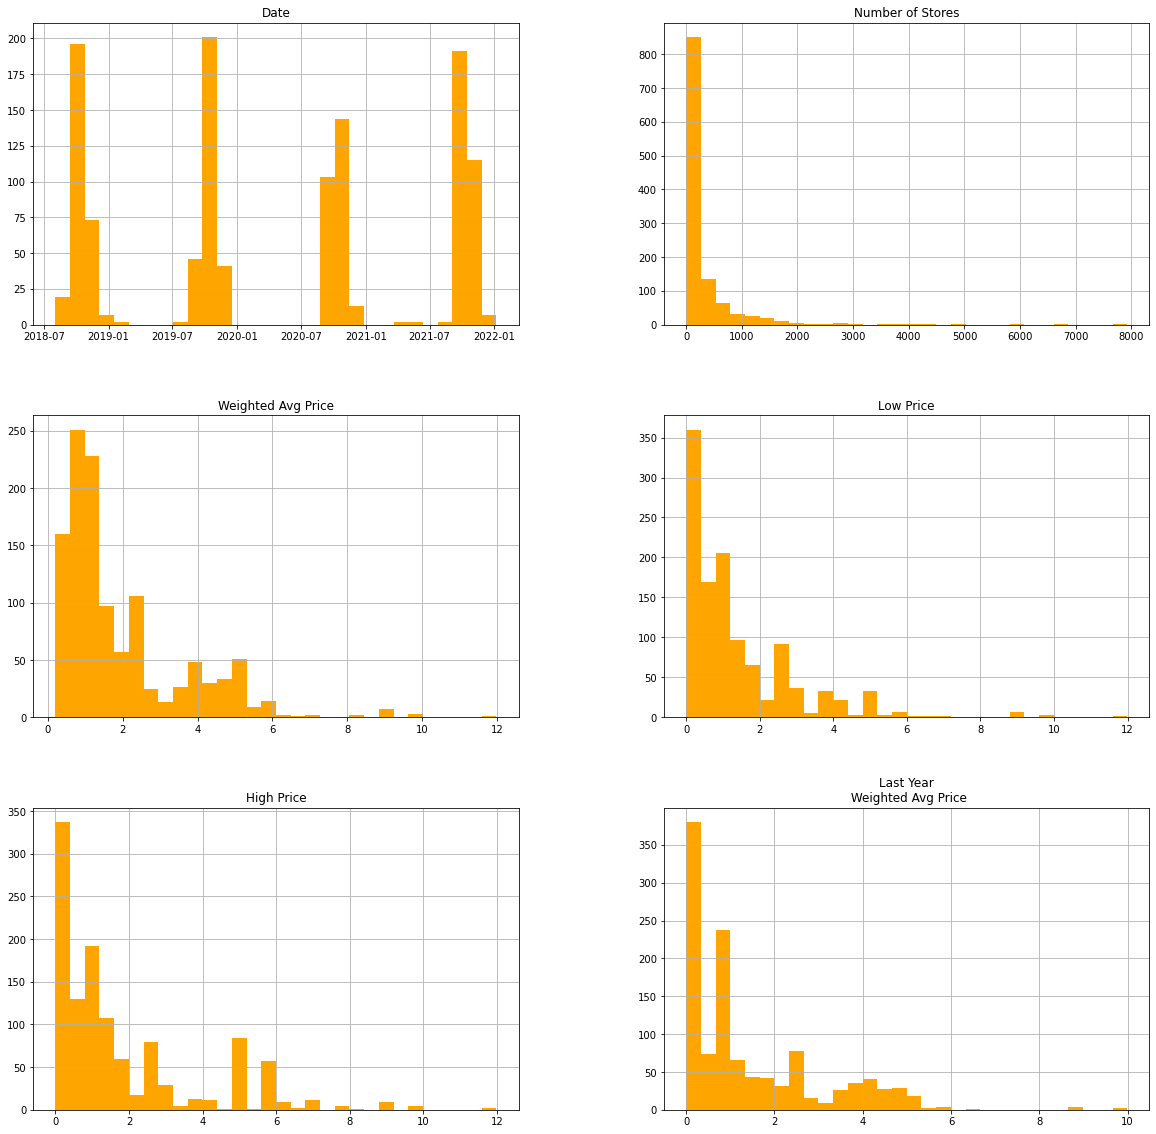

In [9]:
univariate(df)

### Observations:
- Seasonality of data changed during 2020 (possible COVID related?) but interesting that 2021 year began early and hadn't reached toward previous years. [ see date ]
- Weighted average price is right-skewed due to high-priced pumpkin anomalies.
- Previous years weighted average price is similarly skewed (makes sense) though there are some abnormalities that could be looked at too. (Such as heavier volume of prices within $4-$5 range.)

______________________

## Set Index and look at Time series of data:
Because of the seasonality of pumpkins (growth times and when pumpkin-flavored things seeme to come out, I know that in any sort of prediction method (such as analyzing each states pumpkin growth and sales to predict future results) this will be more of a time-series project. <br><br>
Let's see now what that looks like by setting the index as date.

In [10]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2018-08-03', '2018-08-03', '2018-08-31', '2018-08-31',
               '2018-08-31', '2018-08-31', '2018-09-07', '2018-09-07',
               '2018-09-07', '2018-09-07',
               ...
               '2021-11-26', '2021-11-26', '2021-11-26', '2021-12-03',
               '2021-12-03', '2021-12-03', '2021-12-24', '2021-12-24',
               '2022-01-07', '2022-01-07'],
              dtype='datetime64[ns]', name='Date', length=1166, freq=None)

In [11]:
#seeing the time series of how many stores pumpkins sold to during which months/years
y = df["Number of Stores"]

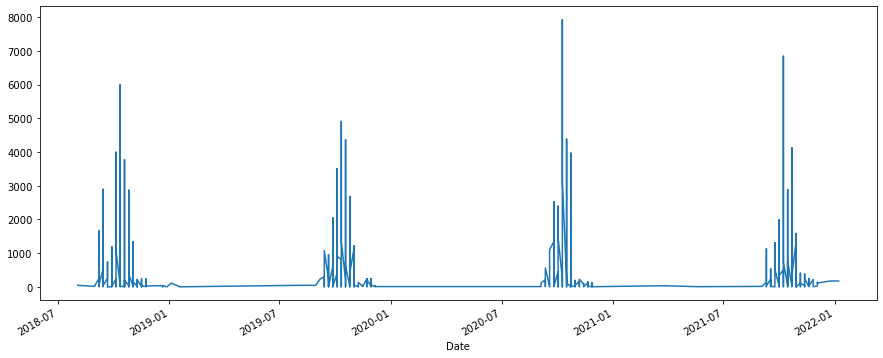

In [12]:
y.plot(figsize=(15, 6))
plt.show()

In [13]:
#looking at just 2020 stores that sold pumpkins using count:
y['2020']

Date
2020-09-04      9
2020-09-04    123
2020-09-04      9
2020-09-04    123
2020-09-11    206
             ... 
2020-11-27      7
2020-11-27    123
2020-11-27      7
2020-12-04      7
2020-12-04      7
Name: Number of Stores, Length: 260, dtype: int64

In [14]:
#looking at weighted avg price over time:
y = df["Weighted Avg Price"]

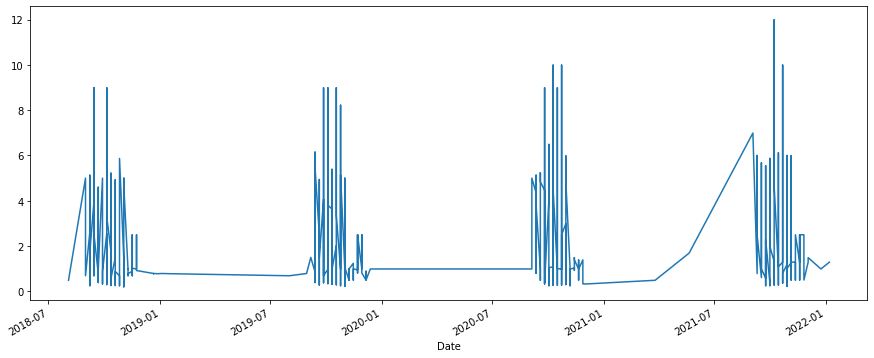

In [15]:
y.plot(figsize=(15, 6))
plt.show()

### Takeaways:
-It is interesting to note the sloping difference of price and pumpkin availability during months in 2021 that wouldn't otherwise be in previous years.

In [16]:
#looking at just 2021 pricing:
y['2021':].head(32)

Date
2021-03-26    0.49
2021-03-26    0.49
2021-05-21    1.69
2021-05-21    1.69
2021-09-03    6.99
2021-09-03    6.99
2021-09-10    0.79
2021-09-10    6.00
2021-09-10    1.77
2021-09-10    4.72
2021-09-10    1.29
2021-09-10    2.50
2021-09-10    0.80
2021-09-10    0.99
2021-09-10    5.00
2021-09-10    1.29
2021-09-10    3.96
2021-09-10    1.99
2021-09-10    5.38
2021-09-10    1.29
2021-09-10    2.13
2021-09-10    1.99
2021-09-10    0.80
2021-09-10    0.99
2021-09-10    5.24
2021-09-10    2.47
2021-09-17    0.61
2021-09-17    5.01
2021-09-17    0.99
2021-09-17    1.29
2021-09-17    1.99
2021-09-17    0.82
Name: Weighted Avg Price, dtype: float64

In [17]:
#looking at same thing for previous years:
y['2020':].head(32)

Date
2020-09-04    0.99
2020-09-04    5.00
2020-09-04    0.99
2020-09-04    5.00
2020-09-11    4.35
2020-09-11    2.34
2020-09-11    0.99
2020-09-11    4.99
2020-09-11    2.56
2020-09-11    5.13
2020-09-11    0.80
2020-09-11    0.81
2020-09-11    2.34
2020-09-11    3.80
2020-09-18    0.99
2020-09-18    0.49
2020-09-18    0.99
2020-09-18    1.19
2020-09-18    1.69
2020-09-18    2.71
2020-09-18    0.67
2020-09-18    0.99
2020-09-18    5.24
2020-09-18    0.49
2020-09-18    0.80
2020-09-18    1.69
2020-09-18    2.50
2020-09-18    0.52
2020-09-18    0.99
2020-09-18    2.50
2020-09-18    1.09
2020-09-18    0.99
Name: Weighted Avg Price, dtype: float64

In [18]:
y['2019':].head(32)

Date
2019-01-04    0.79
2019-01-04    0.79
2019-01-18    0.78
2019-01-18    0.78
2019-08-02    0.69
2019-08-02    0.69
2019-08-30    0.79
2019-08-30    0.79
2019-09-06    1.50
2019-09-06    1.50
2019-09-13    0.85
2019-09-13    5.00
2019-09-13    6.15
2019-09-13    4.07
2019-09-13    5.20
2019-09-13    2.50
2019-09-13    5.00
2019-09-13    2.50
2019-09-13    1.69
2019-09-13    0.80
2019-09-13    0.39
2019-09-13    5.99
2019-09-13    2.50
2019-09-13    1.69
2019-09-13    0.85
2019-09-13    0.39
2019-09-13    5.47
2019-09-20    2.48
2019-09-20    0.88
2019-09-20    4.66
2019-09-20    1.99
2019-09-20    4.48
Name: Weighted Avg Price, dtype: float64

#### Interesting to note that the slope in 2021 is due to early sales happening in March and May where other years do not have this. I wonder what areas are selling during this time?

__________________________________________________________________________________

In [19]:
#seeing what areas are selling early...note, it seems national keeps replicating each area..
df.loc['2021-01-01' : '2021-12-31'].head(10)

,Region,Class,Commodity,Variety,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,Last Year\n Weighted Avg Price
Date,,,,,,,,,,
2021-03-26,NATIONAL,VEGETABLES,PUMPKINS,UNKNOWN,per pound,34,0.49,0.00,0.00,0.00
2021-03-26,SOUTHEAST U.S.,VEGETABLES,PUMPKINS,UNKNOWN,per pound,34,0.49,0.49,0.49,0.00
2021-05-21,NATIONAL,VEGETABLES,PUMPKINS,UNKNOWN,per pound,6,1.69,0.00,0.00,0.00
2021-05-21,HAWAII,VEGETABLES,PUMPKINS,UNKNOWN,per pound,6,1.69,1.69,1.69,0.00
2021-09-03,NATIONAL,VEGETABLES,PUMPKINS,UNKNOWN,each,15,6.99,0.00,0.00,5.00
2021-09-03,MIDWEST U.S.,VEGETABLES,PUMPKINS,UNKNOWN,each,15,6.99,6.99,6.99,0.00
2021-09-10,NORTHWEST U.S.,VEGETABLES,PUMPKINS,MINIATURE,each,146,0.79,0.79,0.79,0.00
2021-09-10,SOUTHWEST U.S.,VEGETABLES,PUMPKINS,UNKNOWN,each,516,6.00,5.00,6.99,0.00
2021-09-10,MIDWEST U.S.,VEGETABLES,PUMPKINS,PIE TYPE,each,261,1.77,1.50,3.99,2.34


#### Note: It looks like SouthEast regions and Hawaii were the sellers of pumpkins during the odd months in 2021.

### MAX price exploration:

In [20]:
#I'm wondering what that spike date was....
y['2021':].max()

11.99

In [21]:
#looking at the dataframe where max price of $11.99 to find what area it was...
df[df['Weighted Avg Price'] == 11.99]

,Region,Class,Commodity,Variety,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,Last Year\n Weighted Avg Price
Date,,,,,,,,,,
2021-10-08,HAWAII,VEGETABLES,PUMPKINS,UNKNOWN,each,6,11.99,11.99,11.99,9.99


In [22]:
#and in previous years in Hawaii?
df[df['Region'] == 'HAWAII']

,Region,Class,Commodity,Variety,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,Last Year\n Weighted Avg Price
Date,,,,,,,,,,
2018-10-05,HAWAII,VEGETABLES,PUMPKINS,UNKNOWN,per pound,44,0.79,0.79,0.79,0.79
2018-10-12,HAWAII,VEGETABLES,PUMPKINS,UNKNOWN,per pound,79,0.83,0.79,0.89,0.78
2018-10-19,HAWAII,VEGETABLES,PUMPKINS,UNKNOWN,each,21,4.00,4.00,4.00,0.00
2018-10-19,HAWAII,VEGETABLES,PUMPKINS,UNKNOWN,per pound,4,0.79,0.79,0.79,0.89
2018-10-26,HAWAII,VEGETABLES,PUMPKINS,UNKNOWN,per pound,32,0.69,0.69,0.69,0.79
2018-10-26,HAWAII,VEGETABLES,PUMPKINS,MINIATURE,per pound,3,1.29,1.29,1.29,0.00
2019-09-27,HAWAII,VEGETABLES,PUMPKINS,UNKNOWN,each,21,5.99,5.99,5.99,0.00
2019-10-04,HAWAII,VEGETABLES,PUMPKINS,UNKNOWN,per pound,23,0.79,0.79,0.79,0.79
2019-10-11,HAWAII,VEGETABLES,PUMPKINS,UNKNOWN,each,21,5.00,5.00,5.00,0.00


## Bivariate Exploration:

#### What is the relationship between date and weighted average price?

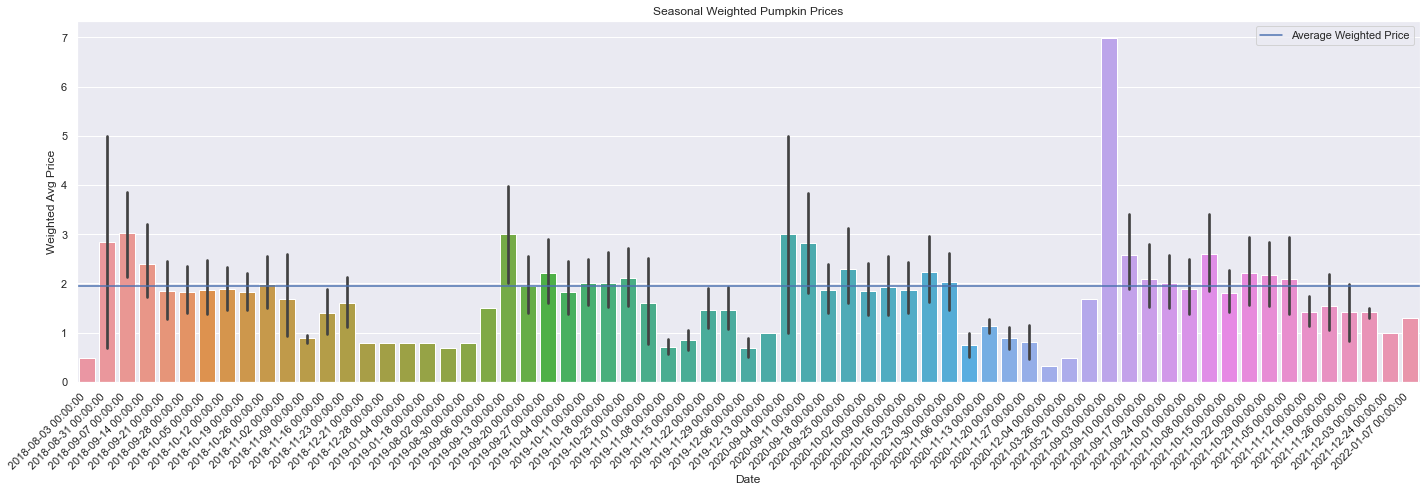

In [45]:
import matplotlib.dates as mdates

fig, axes = plt.subplots(figsize=(20,7))
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y-%m')


plt.title("Seasonal Weighted Pumpkin Prices")
sns.barplot(x= df.index, y=df["Weighted Avg Price"], data=df)
avg_weighted_price = df['Weighted Avg Price'].mean()
plt.axhline(avg_weighted_price, label="Average Weighted Price")


locs, labels = plt.xticks()
plt.setp(labels, rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()
